# Fundamentals of Machine Learning - Exercise 9
Goal of this excercise is to complete the hands-on experience of the classification task.

## Household Prices Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* ... I bet that you already know the data pretty well 😅

![meme03](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_03.jpg?raw=true)

**Important attributes description:**
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level)



In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC

# 🎯 Our goal is to predict if the house will be sold for more than 250k USD or not
* We will use categorized price as a **Target** variable

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv', sep=',')
df = df.loc[:, ['SalePrice','MSSubClass','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','Heating','CentralAir','GrLivArea','BedroomAbvGr']]
df.loc[:, ['Target']] = (df.SalePrice > 250000).astype(int)
df = df.drop(['SalePrice'], axis=1)

In [55]:
df.head()

,MSSubClass,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,Heating,CentralAir,GrLivArea,BedroomAbvGr,Target
0,60,1Fam,2Story,7,5,2003,GasA,Y,1710,3,0
1,20,1Fam,1Story,6,8,1976,GasA,Y,1262,3,0
2,60,1Fam,2Story,7,5,2001,GasA,Y,1786,3,0
3,70,1Fam,2Story,7,5,1915,GasA,Y,1717,3,0
4,60,1Fam,2Story,8,5,2000,GasA,Y,2198,4,0


# Take a look at the features
* We will need it to answer the questions

In [56]:
df.describe()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,Target
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,5.575342,1971.267808,1515.463699,2.866438,0.148630
std,42.300571,1.382997,1.112799,30.202904,525.480383,0.815778,0.355845
min,20.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,20.000000,5.000000,5.000000,1954.000000,1129.500000,2.000000,0.000000
50%,50.000000,6.000000,5.000000,1973.000000,1464.000000,3.000000,0.000000
75%,70.000000,7.000000,6.000000,2000.000000,1776.750000,3.000000,0.000000
max,190.000000,10.000000,9.000000,2010.000000,5642.000000,8.000000,1.000000


## Categorial features EDA

In [57]:
df.describe(exclude=np.number)

,BldgType,HouseStyle,Heating,CentralAir
count,1460,1460,1460,1460
unique,5,8,6,2
top,1Fam,1Story,GasA,Y
freq,1220,726,1428,1365


### BldgType

In [58]:
df.BldgType.value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

### HouseStyle

In [59]:
df.HouseStyle.value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

### Heating

In [60]:
df.Heating.value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

## Missing values

In [61]:
df.isna().sum()

MSSubClass      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
Heating         0
CentralAir      0
GrLivArea       0
BedroomAbvGr    0
Target          0
dtype: int64

## Labels distribution

In [62]:
df.Target.value_counts()

Target
0    1243
1     217
Name: count, dtype: int64

## Kodovani
Pouzijeme one-hot encoding na pro kodovani zminenych sloupcu.

In [63]:
df = pd.concat([df, pd.get_dummies(df['BldgType'], prefix='BldgType')], axis=1)

In [64]:
df = pd.concat([df, pd.get_dummies(df['HouseStyle'], prefix='HouseStyle')], axis=1)

In [65]:
df = pd.concat([df, pd.get_dummies(df['Heating'], prefix='Heating')], axis=1)

In [66]:
df = df.drop(['BldgType', 'HouseStyle', 'Heating'], axis=1)

In [67]:
df = pd.concat([df, pd.get_dummies(df['CentralAir'], prefix='CentralAir')], axis=1)
df = df.drop(['CentralAir'], axis=1)

In [68]:
X, y = df.loc[:, df.columns != 'Target'], df.loc[:, 'Target']


In [69]:
X.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,GrLivArea,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,HouseStyle_SFoyer,HouseStyle_SLvl,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y
0,60,7,5,2003,1710,3,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,20,6,8,1976,1262,3,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,60,7,5,2001,1786,3,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,70,7,5,1915,1717,3,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,60,8,5,2000,2198,4,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [70]:
y.value_counts()

Target
0    1243
1     217
Name: count, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 27), (292, 27), (1168,), (292,))

In [72]:
clf = DecisionTreeClassifier()

In [73]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [74]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

# Confusion Matrix

In [75]:
confusion_matrix(y_test, y_pred)

array([[231,  10],
       [ 14,  37]])

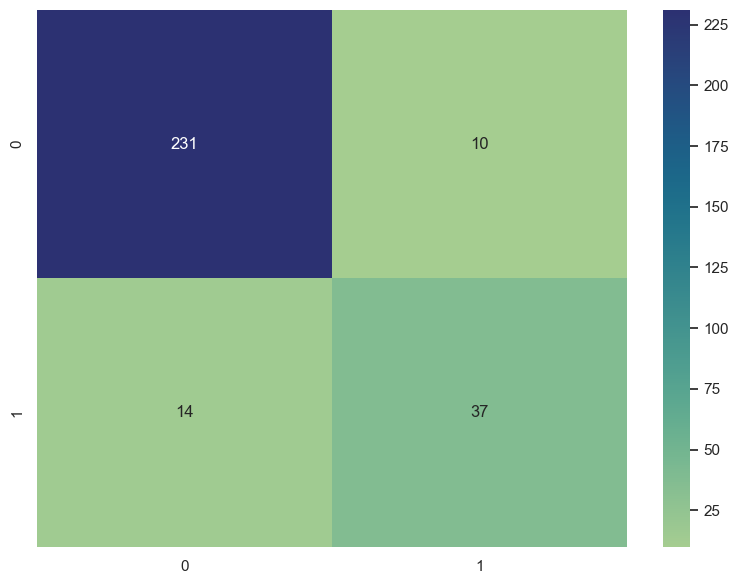

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="crest", fmt='g')
plt.tight_layout()
plt.savefig('confusion_matrix_high_quality.png', dpi=300)
plt.show()

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(np.int64(231), np.int64(10), np.int64(14), np.int64(37))

# Cross-validation 🤔
pouzijeme **Stratified K-Fold** kvuli vlastnosti dat. Nektere "foldy" muzou mit velmi male az nulove instance mensinovych dat (domy prodavane za vice jak 250k USD)

In [78]:
skf = StratifiedKFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')

scores

Survival ratio in train set: 0.15; Survival ratio in test set: 0.15
Survival ratio in train set: 0.15; Survival ratio in test set: 0.15
Survival ratio in train set: 0.15; Survival ratio in test set: 0.15
Survival ratio in train set: 0.15; Survival ratio in test set: 0.15
Survival ratio in train set: 0.15; Survival ratio in test set: 0.15


[0.6521739130434783,
 0.7857142857142857,
 0.5822784810126582,
 0.7191011235955056,
 0.6835443037974683]

In [79]:
np.mean(scores)

np.float64(0.6845624214326793)

In [80]:
scores_global_md = []

for x in range(2, 25):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(max_depth = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global_md.append((x, np.mean(scores)))

scores_global_md[:10]

[(2, np.float64(0.7153132832080201)),
 (3, np.float64(0.7375223655963996)),
 (4, np.float64(0.7526828252540396)),
 (5, np.float64(0.7276220532975006)),
 (6, np.float64(0.7336571463993944)),
 (7, np.float64(0.7182019895619491)),
 (8, np.float64(0.7207939502840292)),
 (9, np.float64(0.7074699213829649)),
 (10, np.float64(0.7149604987311726)),
 (11, np.float64(0.6925760286225402))]

In [81]:
df_res = pd.DataFrame.from_records(scores_global_md, columns=['max_depth', 'f1'])
df_res.tail()

,max_depth,f1
18,20,0.691997
19,21,0.691997
20,22,0.691997
21,23,0.691997
22,24,0.691997


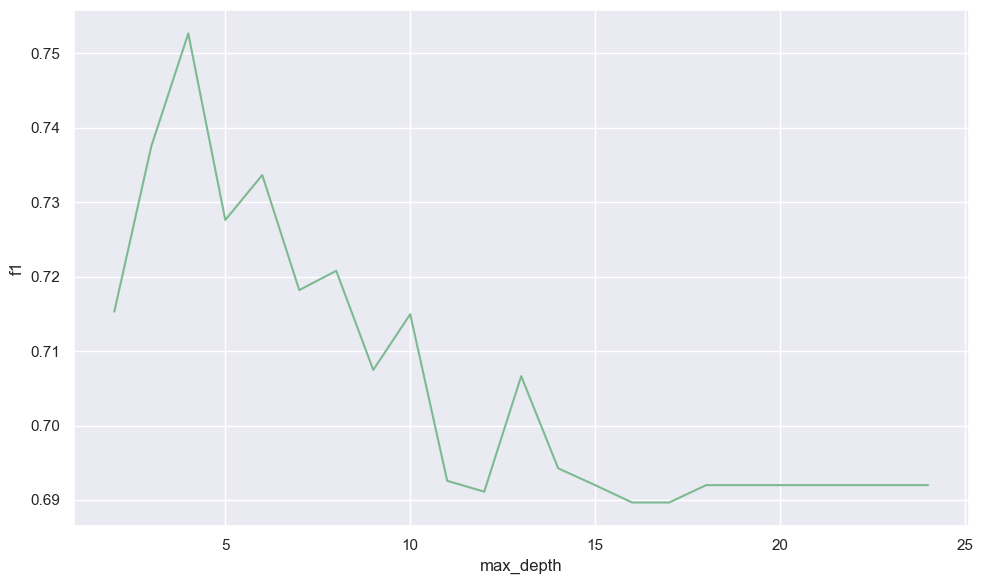

In [82]:
plt.figure(figsize=(10, 6))
sns.set_theme(palette="crest")
sns.lineplot(data=df_res, x='max_depth', y='f1')
plt.tight_layout()
plt.show()

In [83]:
df_res.sort_values(by='f1', ascending=False).head(5)

,max_depth,f1
2,4,0.752683
1,3,0.737522
4,6,0.733657
3,5,0.727622
6,8,0.720794


In [84]:
scores_global_mss = []

for x in np.arange(2, 50):
    skf = KFold(n_splits=5)
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = DecisionTreeClassifier(min_samples_split = x, random_state = 13)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred))
    scores_global_mss.append((x, np.mean(scores)))


scores_global_mss[:10]

[(np.int64(2), np.float64(0.691996586621386)),
 (np.int64(3), np.float64(0.6903861998620764)),
 (np.int64(4), np.float64(0.6933525476067937)),
 (np.int64(5), np.float64(0.70037322515213)),
 (np.int64(6), np.float64(0.6986255141677568)),
 (np.int64(7), np.float64(0.724866533778937)),
 (np.int64(8), np.float64(0.7195792859385011)),
 (np.int64(9), np.float64(0.709624049262068)),
 (np.int64(10), np.float64(0.7121875450315396)),
 (np.int64(11), np.float64(0.7221704392099835))]

In [85]:
df_res = pd.DataFrame.from_records(scores_global_mss, columns=['min_samples_split', 'f1'])
df_res.tail()

,min_samples_split,f1
43,45,0.702317
44,46,0.702317
45,47,0.702317
46,48,0.699444
47,49,0.681144


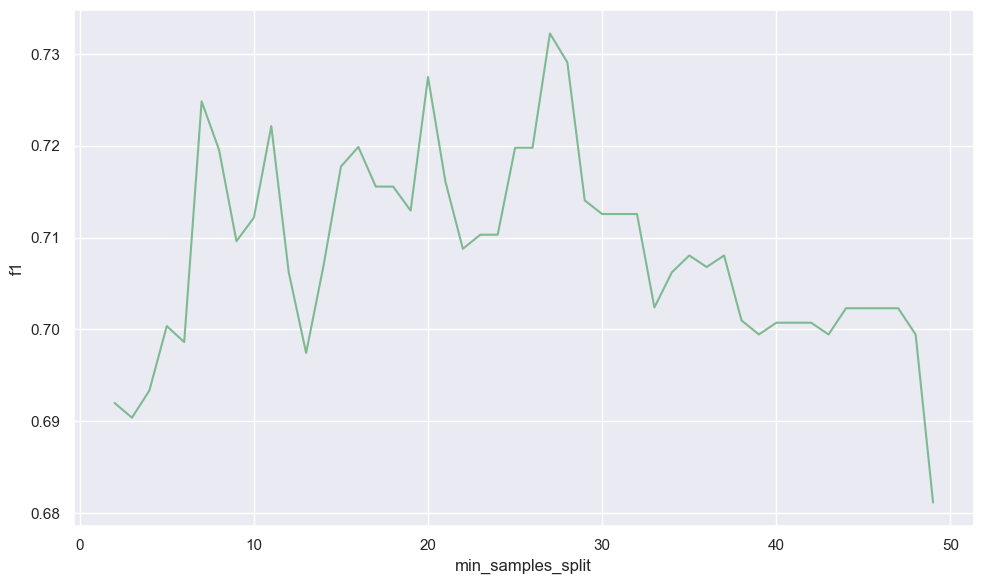

In [86]:
plt.figure(figsize=(10, 6))
sns.set_theme(palette="crest")
sns.lineplot(data=df_res, x='min_samples_split', y='f1')
plt.tight_layout()
plt.show()

In [87]:
df_res.sort_values(by='f1', ascending=False).head(5)

,min_samples_split,f1
25,27,0.732264
26,28,0.729116
18,20,0.727517
5,7,0.724867
9,11,0.722170


In [88]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.691996586621386),
 np.float64(0.6444444444444445),
 np.float64(0.7735849056603774))

In [89]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 27, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.7364967944088268),
 np.float64(0.6373626373626373),
 np.float64(0.8115942028985508))

# SVC


In [90]:
scores_svc_C = []

for C_val in np.logspace(-3, 3, 20):
    skf = KFold(n_splits=5)
    scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        clf = SVC(C=C_val, kernel="rbf", random_state=13)
        clf.fit(X_train, y_train)
        scores.append(f1_score(y_test, clf.predict(X_test)))

    scores_svc_C.append((C_val, np.mean(scores)))

scores_svc_C[:10]


[(np.float64(0.001), np.float64(0.0)),
 (np.float64(0.00206913808111479), np.float64(0.0)),
 (np.float64(0.004281332398719396), np.float64(0.0)),
 (np.float64(0.008858667904100823), np.float64(0.0)),
 (np.float64(0.018329807108324356), np.float64(0.0)),
 (np.float64(0.0379269019073225), np.float64(0.0)),
 (np.float64(0.07847599703514611), np.float64(0.008888888888888889)),
 (np.float64(0.1623776739188721), np.float64(0.15051484921453961)),
 (np.float64(0.3359818286283781), np.float64(0.25088756613756613)),
 (np.float64(0.6951927961775606), np.float64(0.3351901921972199))]

In [91]:
df_res = pd.DataFrame.from_records(scores_svc_C, columns=['C', 'f1'])
df_res.tail()

,C,f1
15,54.555948,0.559661
16,112.883789,0.576562
17,233.572147,0.606840
18,483.293024,0.631380
19,1000.000000,0.642693


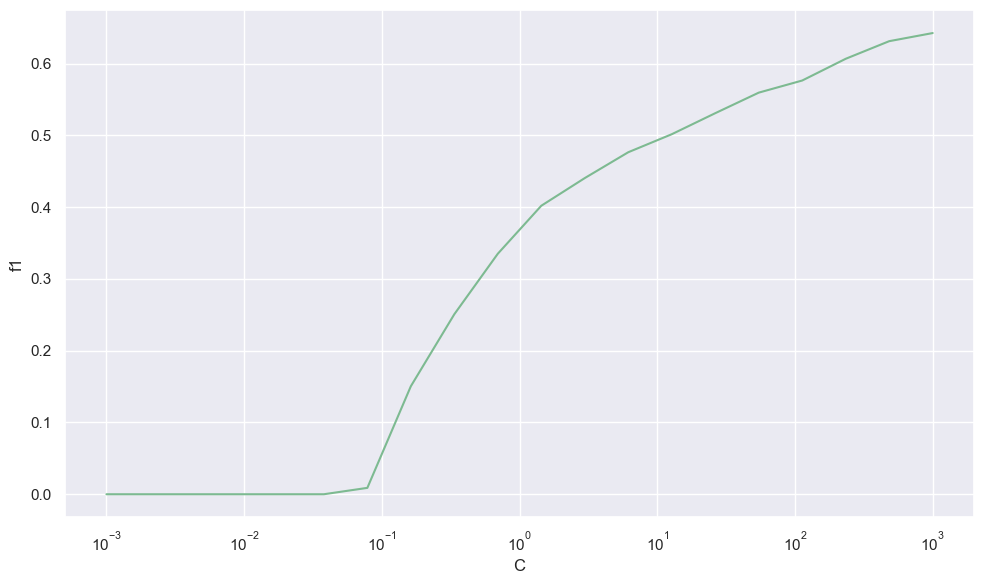

In [92]:
plt.figure(figsize=(10, 6))
sns.set_theme(palette="crest")
sns.lineplot(data=df_res, x='C', y='f1')
plt.xscale("log")
plt.tight_layout()
plt.show()

In [93]:
df_res.sort_values(by='f1', ascending=False).head(5)

,C,f1
19,1000.000000,0.642693
18,483.293024,0.631380
17,233.572147,0.606840
16,112.883789,0.576562
15,54.555948,0.559661


In [94]:
scores_svc_gamma = []

for gamma in np.logspace(-4, 1, 20):
    skf = KFold(n_splits=5)
    scores = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        clf = SVC(gamma=gamma, kernel="rbf", random_state=13)
        clf.fit(X_train, y_train)
        scores.append(f1_score(y_test, clf.predict(X_test)))

    scores_svc_gamma.append((gamma, np.mean(scores)))

scores_svc_gamma[:10]


[(np.float64(0.0001), np.float64(0.6057133531046575)),
 (np.float64(0.00018329807108324357), np.float64(0.6193656456487162)),
 (np.float64(0.0003359818286283781), np.float64(0.6312269407321881)),
 (np.float64(0.0006158482110660267), np.float64(0.6136235795732363)),
 (np.float64(0.0011288378916846883), np.float64(0.6012688215579098)),
 (np.float64(0.00206913808111479), np.float64(0.5323716581925537)),
 (np.float64(0.00379269019073225), np.float64(0.5031895070104027)),
 (np.float64(0.0069519279617756054), np.float64(0.4381209273182957)),
 (np.float64(0.012742749857031334), np.float64(0.3450293050624532)),
 (np.float64(0.023357214690901212), np.float64(0.2719656449341812))]

In [95]:
df_res = pd.DataFrame.from_records(scores_svc_gamma, columns=['gamma', 'f1'])
df_res.tail()

,gamma,f1
15,0.885867,0.0
16,1.623777,0.0
17,2.976351,0.0
18,5.455595,0.0
19,10.000000,0.0


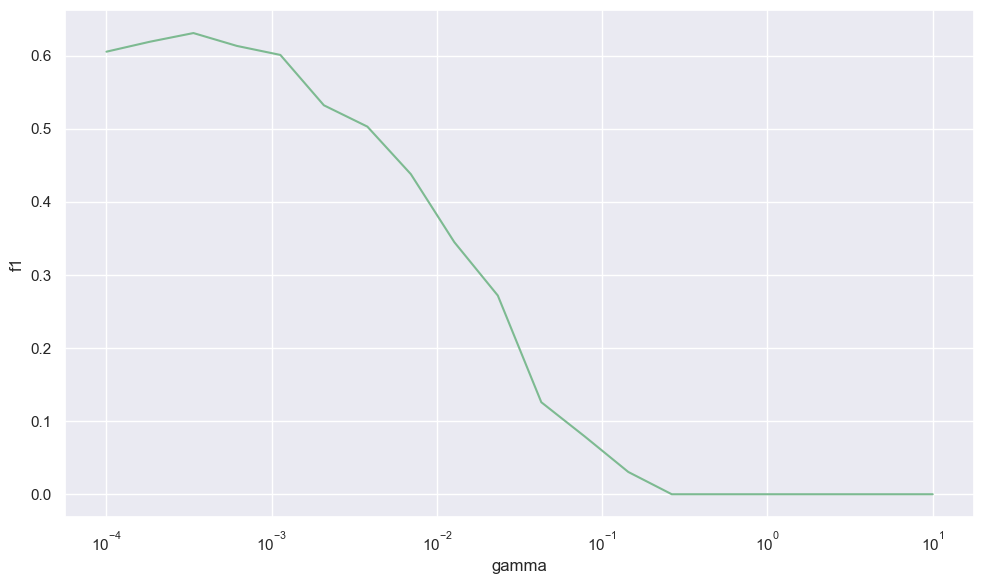

In [96]:

plt.figure(figsize=(10, 6))
sns.set_theme(palette="crest")
sns.lineplot(data=df_res, x='gamma', y='f1')
plt.xscale("log")
plt.tight_layout()
plt.show()

In [97]:
df_res.sort_values(by='f1', ascending=False).head(5)

,gamma,f1
2,0.000336,0.631227
1,0.000183,0.619366
3,0.000616,0.613624
0,0.000100,0.605713
4,0.001129,0.601269


In [98]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = SVC(kernel="rbf", random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.36022082876397754),
 np.float64(0.2857142857142857),
 np.float64(0.39344262295081966))

In [99]:
skf = KFold(n_splits=5)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = SVC(kernel="rbf", random_state=13, gamma=0.000336, C=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

np.mean(scores), np.min(scores), np.max(scores)

(np.float64(0.6790304164811083),
 np.float64(0.6046511627906976),
 np.float64(0.8))

# ✅ Task (2p)
Complete the following tasks:

1. 📈 Describe what operations you are performing for each of the features
    * Mainly focus on categorical features
      
2. 📌 Answer the following questions:
    * **How many values are missing?**
    * **How many instances do you have in each of the classes?**
    * 🔎 **Which metric score do you propose for the classification model performance evaluation?**
        * 💡 This depends on your previous answer
          
3. ⚡Finish your preprocessing pipeline and split the data into the Input and Output part (i.e. `X` and `y` variables)

4. 🌳 Start with the **Decision Tree**
    * Use 5-fold cross validation
    * 🔎 Will you use *standard* cross validation or *stratified* cross validation?
    * Compute mean of the obtained score values
      
5. 🚀 Select one other algorithm from https://scikit-learn.org/stable/supervised_learning.html
    * Repeat the 5-fold CV
      
6. 📒 **Write down which default model is better**

7. 📊 Experiment with hyper-parameters
    * Select at least one important parameter for the model
    * Set the parameter value range
        * You can use random values, interval of values, ...
    * Do the 5-fold CV
        * Compute mean of the obtained score values
    * Document the experiment results using tables and/or plots
    * Describe the results in a Markdown cell

8. 📒 **Write down which model (default or tuned) is the best and why**

* **Document everything you do in a Markdown cells**
    * ❌ Results interpretation figured in real-time during task check is not allowed! ❌

![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_09_meme_01.jpg?raw=true)